In [1]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import math

# Trajectoires des planètes :

Dans ce Notebook Jupyter, nous allons étudier les trajectoire du Soleil, de la Terre et de Mars dans les référentiels héliocentrique et géocentrique.

On commence par importer les modules pythons nécessaires pour réaliser cette activité :

## Constantes des mouvements :

La Terre et Mars décrivent une orbite elliptique autour du Soleil. Il s'agit d'un cercle un peu écrasé, conformément à la figure représentée plus tôt. 

Ces trajectoires sont paramétrées par trois constantes : le demi-grand axe $a$, l'excentricité $e$ (qui caractérise l'écrasement du cercle) et la période de révolution $T$.

Voici la valeur de ces constantes pour la Terre (comme c'est la 3ème planète du système solaire, on les notes $a_3$, $e_3$ et $T_3$) :

- $a_3 = 1,49598\times 10^{11}\ \mathrm m $
- $e_3 = 0,0167$
- $T_3 = 365,25 \ \mathrm{jours}$


Voici la valeur de ces constantes pour Mars (comme c'est la 4ème planète du système solaire, on les notes $a_4$, $e_4$ et $T_4$) :

- $a_4 = 2,27937\times 10^{11} \ \mathrm m $
- $e_4 = 0,09341$
- $T_4 = 686,96 \ \mathrm{jours}$

Comme annoncé dans la vidéo, on voit que l'excentricité de Mars est plus grande que celle de la Terre.

Remplis maintenant les constantes des mouvements des planètes dans la cellule ci-dessus :

In [2]:
#pour la Terre
a_3 = 1.49598e11 # demi grand axe en mètre
e_3 = 0.0167 #excentricité sans unité
T_3 = 365.256 #période de révolution en jours terrestres

#pour Mars
a_4 = 2.27937e11 # demi grand axe en mètre
e_4 = 0.09341 #excentricité sans unité
T_4 = 686.96 #période de révolution en jours terrestres

## Obtention des trajectoires dans le référentiel héliocentrique

On utilise des listes pythons pour stocker l'évolution des trajectoires. 

Le nombre d'éléments de ces listes va dépendre de la durée et de la précision du relevé de positions.

*On choisit de relever la position une fois par jour pendant 15 ans :*

In [3]:
Delta_t = 1 #la position des planètes est enregistrée tous les jours

Suivi = 15 #le suivi sera effectué pendant cette durée exprimée en année

L'équation des positions pour la Terre et pour Mars est conforme à ce qui est énoncé dans le schéma suivant :

![title](schema_ellipse.png)

On définit les listes dans lesquels on va stocker les positions de la Terre et de Mars dans le référentiel héliocentrique :

In [4]:
X_T_helio = [] #Position de la Terre selon l'axe x
Y_T_helio = []
X_M_helio = [] #Position de Mars selon l'axe x
Y_M_helio = []

On remplit itérativement ces listes. Pour cela, on définit un indice $i$ qui va évoluer de 0 à $i_{max}$ :

In [5]:
i = 0
i_max = math.floor(Suivi*T_3/Delta_t) #le nombre de jour total de la simulation

On effectue maintenant l'itération avec une boucle *while* :

In [6]:
while i <= i_max:
    theta_3 = 2*math.pi*Delta_t*i/T_3
    x_t = a_3*e_3+a_3*math.cos(theta_3) #la position en x de la Terre au jour i
    y_t = a_3*math.sqrt(1-e_3*e_3)*math.sin(theta_3) #la position en y de Mars au jour i
        
    theta_4 =2*math.pi*Delta_t*i/T_4
    x_m = a_4*e_4+a_4*math.cos(theta_4) #la position en x de Mars au jour i
    y_m = a_4*math.sqrt(1-e_4*e_4)*math.sin(theta_4) #la position en y de Mars au jour i
                
    #On ajoute toutes les positions calculées aux tableaux des positions
    X_T_helio.append(x_t)
    Y_T_helio.append(y_t)
    X_M_helio.append(x_m)
    Y_M_helio.append(y_m)

    i += 1 

On peut dès à présent tracer les résultats qu'on a obtenu :

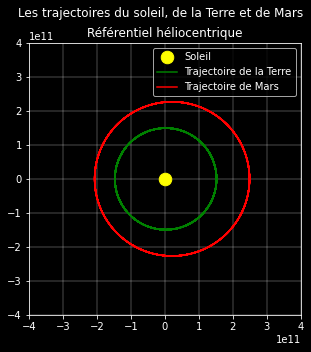

In [7]:
plt.style.use('dark_background')

fig, ax_helio = plt.subplots(1, 1, figsize = (5,5))
fig.suptitle('Les trajectoires du soleil, de la Terre et de Mars')

ax_helio.axis("scaled")
ax_helio.set(xlim=(-4e11, 4e11), ylim=(-4e11, 4e11))

ax_helio.plot(0, 0, '.', markersize=25, color="yellow", label = "Soleil")
ax_helio.grid(True, lw=0.3)
ax_helio.plot(X_T_helio, Y_T_helio, 'g-', label = "Trajectoire de la Terre")
ax_helio.plot(X_M_helio, Y_M_helio, 'r-', label = "Trajectoire de Mars")
ax_helio.title.set_text("Référentiel héliocentrique")
ax_helio.legend()

plt.show()


## Obtention des trajectoires dans le référentiel géocentrique

On utilise encore des listes pythons pour stocker l'évolution des trajectoires. 

On conserve le même $i_{max}$ que précédemment mais on réinitialise $i$:

In [8]:
i= 0
X_M_geo = [] #Position de la Terre selon l'axe x
Y_M_geo = []
X_S_geo = [] #Position du Soleil selon l'axe x
Y_S_geo = []

Pour obtenir les trajectoires du Soleil, de la Terre et de Mars, on fait un changement de référentiel simple :

- $X_i'=X_i - X_T$
- $Y_i'=Y_i - Y_T$

On aura donc pour la Terre :

- $X_T'=X_T - X_T=0$
- $Y_T'=Y_T - Y_T=0$

Cela est logique, puisque la Terre se trouve au centre du référentiel géoentrique, par définition.

Pour Mars :
- $X_M'=X_M - X_T$
- $Y_M'=Y_M - Y_T$

Et pour le Soleil : (on rappelle que $X_S = Y_S = 0$ dans le référentiel héliocentrique)
- $X_S'=X_S - X_T = - X_T$
- $Y_S'=Y_S - Y_T=- Y_T$

In [9]:
while i <= i_max: 
    
    xm=X_M_helio[i] - X_T_helio[i] #la position relative en x de Mars par rapport à la Terre
    ym=Y_M_helio[i] - Y_T_helio[i] #la position relative en y de Mars par rapport à la Terre
    
    xs= - X_T_helio[i] #la position relative en x du soleilpar rapport à la Terre
    ys= - Y_T_helio[i] #la position relative en y du soleilpar rapport à la Terre
    
    #On ajoute toutes les positions calculées aux tableaux des positions
    X_S_geo.append(xs)
    Y_S_geo.append(ys)
    X_M_geo.append(xm)
    Y_M_geo.append(ym)
    
    
    i += 1 #on incrémente i" pour passer au jour suivant


On trace les résultats qu'on a obtenu :

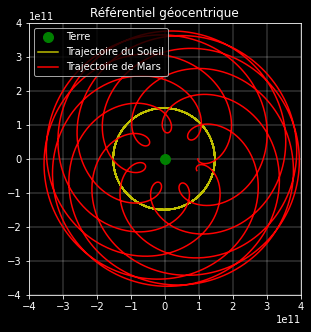

In [10]:
fig, ax_geo = plt.subplots(1, 1, figsize = (5,5))

ax_geo.axis("scaled")
ax_geo.set(xlim=(-4e11, 4e11), ylim=(-4e11, 4e11))
ax_geo.plot(0, 0, '.', markersize=20, color="green", label="Terre")
ax_geo.grid(True, lw=0.3)
ax_geo.plot(X_S_geo, Y_S_geo, 'y-', label ="Trajectoire du Soleil")
ax_geo.plot(X_M_geo, Y_M_geo, 'r-',  label ="Trajectoire de Mars")
ax_geo.title.set_text("Référentiel géocentrique")

ax_geo.legend()

plt.show()


On remarque que la trajectoire de Mars n'est pas fermée. On peut faire durer la simulation plus longtemps et on verrait que la trajectoire de Mars ne redevient jamais pareil !

## Animation des trajectoires :
  
On peut animer les trajectoires en utilisant la fonctionnalité *FuncAnimation* de *matplotlib.animation*.

Pour cela, on doit définir une fonction qui renvoie un itérable des différents éléments à animer pour la i-ème image. C'est ce que fait la fonction **animate**:

On peut maintenant tracer les animations côte à côte :

In [14]:
"""
def animate(i):
    earth_helio.set_data(X_T_helio[i], Y_T_helio[i])
    mars_helio.set_data(X_M_helio[i], Y_M_helio[i])
    sun_geo.set_data(X_S_geo[i], Y_S_geo[i])
    mars_geo.set_data(X_M_geo[i], Y_M_geo[i])
    return earth_helio,mars_helio,sun_geo,mars_geo

anim = FuncAnimation(fig, animate, frames=range(0,Suivi*i_max,4), interval=50, repeat=False, blit = True)
"""

'\ndef animate(i):\n    earth_helio.set_data(X_T_helio[i], Y_T_helio[i])\n    mars_helio.set_data(X_M_helio[i], Y_M_helio[i])\n    sun_geo.set_data(X_S_geo[i], Y_S_geo[i])\n    mars_geo.set_data(X_M_geo[i], Y_M_geo[i])\n    return earth_helio,mars_helio,sun_geo,mars_geo\n\nanim = FuncAnimation(fig, animate, frames=range(0,Suivi*i_max,4), interval=50, repeat=False, blit = True)\n'

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
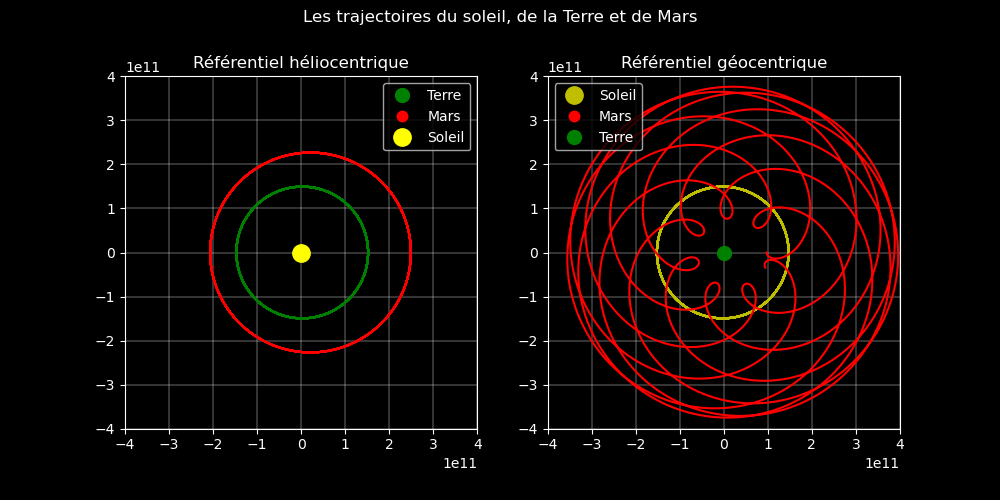

In [15]:
%matplotlib widget

fig, (ax_helio, ax_geo) = plt.subplots(1, 2, figsize = (10,5))
fig.suptitle('Les trajectoires du soleil, de la Terre et de Mars')

ax_helio.axis("scaled")
ax_helio.set(xlim=(-4e11, 4e11), ylim=(-4e11, 4e11))
earth_helio, = ax_helio.plot([], [], 'g.', markersize=20, label = "Terre")
mars_helio, = ax_helio.plot([], [], 'r.', markersize=15, label = "Mars")
ax_helio.plot(0, 0, '.', markersize=25, color="yellow", label = "Soleil")
ax_helio.grid(True, lw=0.3)
ax_helio.plot(X_T_helio, Y_T_helio, 'g-')
ax_helio.plot(X_M_helio, Y_M_helio, 'r-')
ax_helio.title.set_text("Référentiel héliocentrique")
ax_helio.legend()

ax_geo.axis("scaled")
ax_geo.set(xlim=(-4e11, 4e11), ylim=(-4e11, 4e11))
sun_geo, = ax_geo.plot([], [], 'y.', markersize=25, label ="Soleil")
mars_geo, = ax_geo.plot([], [], 'r.', markersize=15, label ="Mars")
ax_geo.plot(0, 0, '.', markersize=20, color="green", label="Terre")
ax_geo.grid(True, lw=0.3)
ax_geo.plot(X_S_geo, Y_S_geo, 'y-')
ax_geo.plot(X_M_geo, Y_M_geo, 'r-')
ax_geo.title.set_text("Référentiel géocentrique")

ax_geo.legend()

def animate(i):
    earth_helio.set_data(X_T_helio[i], Y_T_helio[i])
    mars_helio.set_data(X_M_helio[i], Y_M_helio[i])
    sun_geo.set_data(X_S_geo[i], Y_S_geo[i])
    mars_geo.set_data(X_M_geo[i], Y_M_geo[i])
    return earth_helio,mars_helio,sun_geo,mars_geo

anim = FuncAnimation(fig, animate, frames=range(0,Suivi*i_max,4), interval=50, repeat=False, blit = True)

plt.show()


En voyant cette animation, on comprend mieux d'où vient la précession de Mars dans le ciel terrestre.

On peut aussi voir qu'il est difficile d'envoyer des sondes sur Mars. En effet, la période durant laquelle Mars est proche de la Terre est très courte !